<a href="https://colab.research.google.com/github/zenosance/machine-learning/blob/main/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1
Klasisfikasi Iris dengan Perceptron

## Deskripsi
Pada praktikum ini, Anda diminta untuk melakukan klasifikasi data iris dengan menggunakan model perceptron. Jadi kita akan menggunakan dataset iris pada praktikum sebelumnya.

Untuk menambah pemahaman proses akan dilakukan secara manual.

## Langkah 1: Import Library


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Langkah 2: Load Data dan Visualisasi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/machine-learning/data/Iris.csv', header=None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


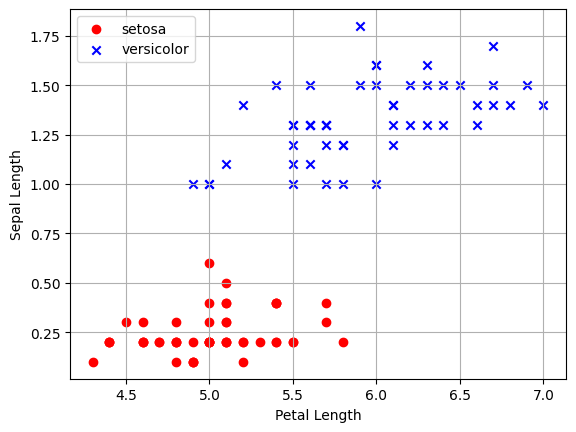

In [ ]:
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Langkah 3: Membuat Kelas Perceptron

In [ ]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Langkah 4: Pilih Data dan Encoding Label

In [ ]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

## Langkah 5: Fitting Model

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

## Langkah 6: Visualisasi Nilai Error Per Epoch

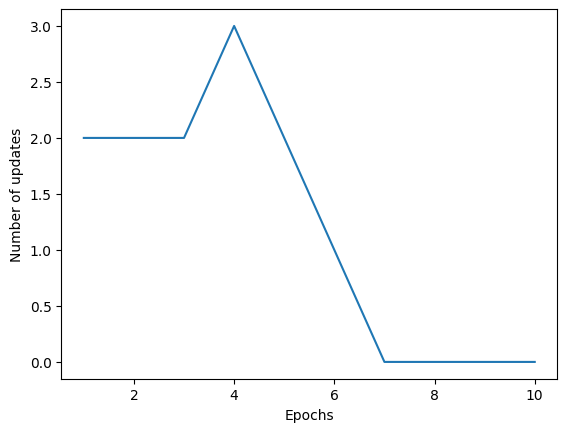

In [ ]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

## Langkah 7: Visualisasi Decision Boundary

In [ ]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

<ipython-input-31-a58a4a863c9c>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


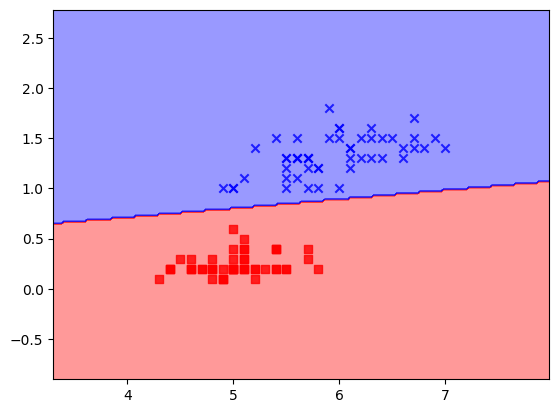

In [ ]:
plot_decision_regions(X, y, ppn)

<hr>

# Praktikum 2
Klasifikasi Berita dengan Perceptron

## Deskripsi
Dalam kasus ini, Anda akan melakukan klasifiaksi berita berdasarkan 3 kategori, yaitu Sport Hockey, Sport Baseball, dan Otomotif. Proses klasifikasi akan menggunakan model Perceptron.

## Langkah 1: Import Library

In [ ]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

## Langkah 2: Pilih Label dan Split Data

In [ ]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

## Langkah 3: Ekstrak Fitur dan Buat Model Perceptron

In [ ]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



## Penjelasan
Dataset yang digunakan pada kode program diatas adalah 20newsgroup yang terdiri dari sekitar 20.000 dokumen. Scikit-learn bahkan menyediakan fungsi yang memberikan kemudahan untuk mengunduh dan membaca kumpulan dataset dengan menggunakan sklearn.datasets. pada kode program diatas Perceptron mampu melakukan klasifikasi multikelas; strategi yang digunakan adalah one-versus-all untuk melakukan pelatihan untuk setiap kelas dalam data training. Dokumen teks memerlukan ekstraksi fitur salah satunya adalah bobot tf-idf pada kodeprogram diatas digunakan ```tfidf-vectorizer```.

<hr>

# Praktikum 3

Nilai Logika XOR dengan MLP
## Deskripsi
Pada kasus sederhana ini, Anda akan menggunakan MLP untuk mendapatkan nilai biner yang dioperasikan dengan logika XOR. Perlu diingat bahwa nilai XOR berbeda dengan OR, XOR hanya akan bernilai benar jika salah satu nilai yang benar, bukan keduanya atau tidak sama sekali.
## Langkah 1: Import Library

In [ ]:
from sklearn.neural_network import MLPClassifier

Langkah 2: Buat Data

In [ ]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

## Langkah 3: Fit Model

In [ ]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

## Langkah 4: Prediksi

In [ ]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


<hr>

# Praktikum 4
Klasifikasi dengan ANN

## Deskripsi
Pada praktikum kali ini, Anda diminta untuk membuat model ANN untuk mengklasifikasi potensi seorang customer akan meninggalkan perusahaan Anda atau tidak. Istirlah populer dari fenomena ini disebut sebagai 'churn'. Tingkat churn yang tinggi (chrun rate) akan berdampak tidak baik bagi perusahaan.

## Pra Pengolahan Data

## Langkah 1: Import Library

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Langkah 2: Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv('/content/drive/MyDrive/machine-learning/data/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

Mounted at /content/drive


Cek Data(X)

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


## Langkah 3: Encoding Data Kategorikal

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

Cek data (X) dengan print. Hasilnya,

In [ ]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


## Langkah 4: Encoding Kolom "Geography" dengan One Hot Encoder

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

Cek data (X) dengan print. Hasilnya,

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


## Langkah 5: Split Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Langkah 6: Scalling Fitur

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Membuat Model ANN**

## Langkah 1: Inisial Model ANN

In [ ]:
ann = tf.keras.models.Sequential()

## Langkah 2: Membuat Input Layer dan Hidden Layer Pertama

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

## Langkah 3: Membuat Hidden Layer Kedua

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

## Langkah 4: Membuat Output Layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## **Training Model**

## Langkah 1: Compile Model (Menyatukan Arsitektur) ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Langkah 2: Fitting Model

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 3s 3ms/step - loss: 0.7272 - accuracy: 0.5890
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6147 - accuracy: 0.7939
Epoch 3/100
250/250 [==============================] - 2s 6ms/step - loss: 0.5723 - accuracy: 0.8010
Epoch 4/100
250/250 [==============================] - 2s 7ms/step - loss: 0.5386 - accuracy: 0.8099
Epoch 5/100
250/250 [==============================] - 2s 7ms/step - loss: 0.5031 - accuracy: 0.8179
Epoch 6/100
250/250 [==============================] - 2s 6ms/step - loss: 0.4358 - accuracy: 0.8265
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4012 - accuracy: 0.8410
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3832 - accuracy: 0.8475
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3715 - accuracy: 0.8504
Epoch 10/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3626 - accura

## **Membuat Prediksi**

Diberikan informasi sebagai berikut,
- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40 years old
- Tenure: 3 years
- Balance: $ 60000

- Number of Products: 2
- Does this customer have a credit card ? Yes
- Is this customer an Active Member: Yes
- Estimated Salary: $ 50000

Apakah customer tersebut perlu dipertahankan?

## Modelkan Data Baru dan Buat Prediksi

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 113ms/step
[[False]]


Apakah hasilnya **False?**

**Jawab: Iya**

## Prediksi Dengan Data Testing

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 4ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Cek Akurasi dan Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1516   79]
 [ 197  208]]


0.862

Hasil (bisa jadi berbeda),

# Tugas
- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
- Anda diperbolehkan melakukan eksplorasi terhadap,
  - Metode pra pengolahan
  - Pemilihan fitur
  - Arsitektur ANN
  - Fungsi Aktiviasi
- ANN diimplementasikan dengan menggunakan tensorflow.
- DIKERJAKAN SECARA BERKELOMPOK
- JELASKAN HASIL YANG ANDA DAPATKAN,
  - AKURASI
  - CONFUSION MATRIX
  - KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

## Import Library

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## Pra-pengolahan Data

In [2]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


MNIST dataset ini terdiri dari 60.000 data untuk pelatihan dan 10.000 data untuk pengujian. Setiap gambar dalam dataset ini memiliki resolusi sebesar 28x28 piksel. Dengan menggunakan fungsi ini, dataset akan secara otomatis dibagi menjadi dua bagian: data pelatihan dan data pengujian.

## Normalisasi Pixel

Kita menormalisai value range dari pixel dari 0-255 ke 0-1 saja


In [3]:
X_train_full, X_test = X_train_full / 255.0, X_test / 255.0

## Split Data

Dalam tahap pemisahan data, data pelatihan lengkap yang terdiri dari 60.000 sampel gambar angka dibagi menjadi tiga bagian utama. Pertama, 10% dari data pelatihan, yaitu 6.000 sampel, disisihkan sebagai data validasi. Ini dilakukan untuk memonitor performa model saat pelatihan dan mencegah overfitting. Sisanya, 54.000 sampel, digunakan sebagai data pelatihan utama untuk mengoptimalkan model. Selain itu, data pengujian yang terdiri dari 10.000 sampel tetap tidak terpengaruh oleh pemisahan ini dan akan digunakan untuk menguji performa model setelah pelatihan selesai. Penggunaan parameter random_state=42 memastikan konsistensi pembagian data dalam eksperimen yang berulang


In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

## Membaut Arsistektur ANN

Model yang didefinisikan di sini adalah model Neural Network berbasis Sequential, yang dibangun dengan menggunakan TensorFlow dan Keras. Model ini terdiri dari beberapa lapisan. Lapisan pertama adalah lapisan Flatten yang berfungsi untuk mengubah gambar dengan resolusi 28x28 piksel menjadi vektor satu dimensi. Kemudian, ada dua lapisan Dense dengan masing-masing 128 dan 64 neuron yang diaktivasi oleh fungsi ReLU (Rectified Linear Unit). Fungsi aktivasi ReLU bertanggung jawab untuk menambahkan sifat non-linear ke model. Lapisan terakhir adalah lapisan Dense dengan 10 neuron yang diaktivasi oleh softmax, yang digunakan untuk menghasilkan distribusi probabilitas dari kelas-kelas yang mungkin (0 hingga 9) untuk setiap gambar. Model ini akan digunakan untuk melakukan klasifikasi digit pada dataset MNIST, di mana output akhir akan menjadi probabilitas untuk setiap digit, dan kelas dengan probabilitas tertinggi akan dianggap sebagai prediksi akhir.

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

## Kompilasi Model

Kita perlu melakukan kompilasi untuk model ANN yang sudah kita buat untuk dijadikan satu


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Latih Model
Selanjutnya, bisa dilakukan proses latih untuk model

In [7]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1688/1688 [==============================] - 9s 4ms/step - loss: 0.2527 - accuracy: 0.9253 - val_loss: 0.1252 - val_accuracy: 0.9607
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1061 - accuracy: 0.9685 - val_loss: 0.0958 - val_accuracy: 0.9725
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0745 - accuracy: 0.9770 - val_loss: 0.0871 - val_accuracy: 0.9735
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0557 - accuracy: 0.9830 - val_loss: 0.0792 - val_accuracy: 0.9755
Epoch 5/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0463 - accuracy: 0.9849 - val_loss: 0.0825 - val_accuracy: 0.9770
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0357 - accuracy: 0.9882 - val_loss: 0.0876 - val_accuracy: 0.9767
Epoch 7/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0281 - accuracy: 0.9906 - val_loss: 0.0786 - val_accuracy

Selama proses pelatihan model Neural Network, parameter `epochs=10` mengindikasikan bahwa seluruh data pelatihan akan digunakan 10 kali untuk memperbarui parameter model. Setiap iterasi melalui seluruh dataset dikenal sebagai satu epoch, dan dalam hal ini, pelatihan akan dilakukan selama 10 epoch. Selama pelatihan, data validasi yang telah dipisahkan sebelumnya, yaitu `(X_valid, y_valid)`, digunakan untuk memantau performa model secara teratur. Data validasi membantu dalam mengidentifikasi overfitting, yaitu ketika model terlalu cocok dengan data pelatihan, serta memungkinkan penyesuaian parameter model. Selama proses pelatihan, model menghitung loss dan akurasi pada data pelatihan dan data validasi. Tujuan utama dari pelatihan adalah untuk meminimalkan loss pada data pelatihan sambil memastikan bahwa model tetap berkinerja baik pada data validasi. Setelah 10 epoch, proses pelatihan selesai, dan akurasi model pada data pelatihan dan data validasi dapat dievaluasi.

## Evaluasi Model

Dilakukan evaluasi dari hasil latih model


In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Akurasi pada data pengujian: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0997 - accuracy: 0.9754
Akurasi pada data pengujian: 0.9753999710083008


## Prediksi Gambar untuk Dataset

In [9]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 3ms/step


## Menampilkan Hasil Prediksi

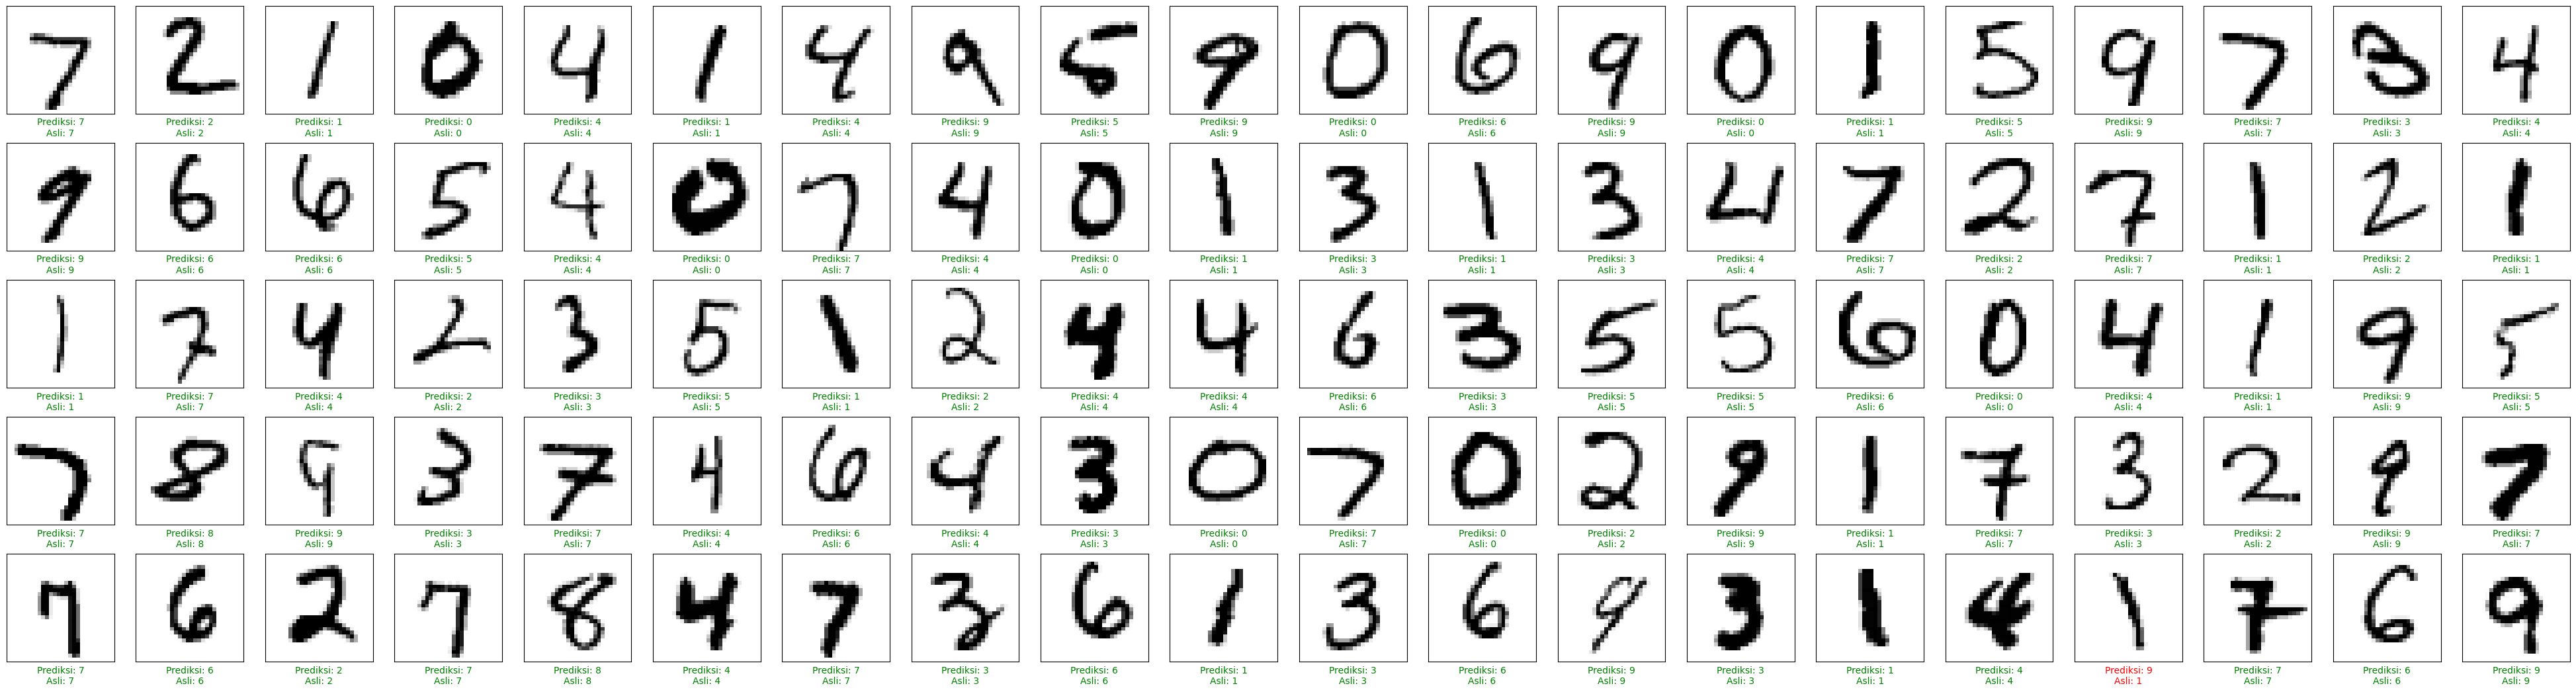

In [18]:
plt.figure(figsize=(50, 13))
for i in range(100):
    plt.subplot(5, 20, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if y_pred_classes[i] == y_test[i]:
        plt.imshow(X_test[i], cmap=plt.cm.binary)
        plt.xlabel(f'Prediksi: {y_pred_classes[i]}\nAsli: {y_test[i]}', color='green')
    else:
        plt.imshow(X_test[i], cmap=plt.cm.binary)
        plt.xlabel(f'Prediksi: {y_pred_classes[i]}\nAsli: {y_test[i]}', color='red')
plt.show()

Dari pengujian 100 gambar, didapatkan 1 kesalahan

## Confussion Matrix

In [20]:
confusion = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[ 973    1    0    1    0    1    1    2    1    0]
 [   0 1122    3    2    0    0    2    2    3    1]
 [   1    0 1018    6    2    0    0    2    3    0]
 [   2    0    5  992    0    3    0    4    3    1]
 [   0    0    3    0  968    1    1    2    0    7]
 [   2    0    1   12    1  870    1    0    4    1]
 [  14    2    2    1   21    7  909    0    2    0]
 [   1    3   10    4    3    0    0  998    3    6]
 [   3    0    7    9    5    7    3    5  929    6]
 [   3    2    0    2   15    5    0    4    3  975]]


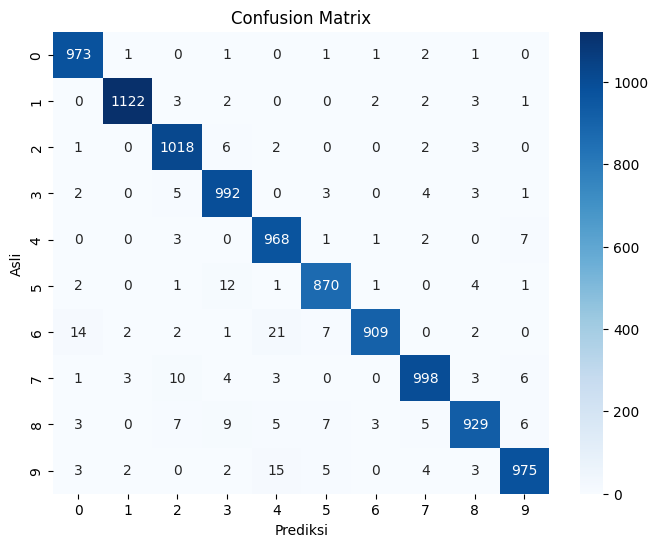

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

confusion = confusion_matrix(y_test, y_pred_classes)

# Membuat heatmap confusion matrix dengan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)

plt.xlabel('Prediksi')
plt.ylabel('Asli')
plt.title('Confusion Matrix')
plt.show()


## **Terima Kasih**